Copyright 2021 Takehiro Ajioka

### Enviroment

Python 3.6
Anaconda
tensorflow-gpu==1.15.0
keras==2.3.1
shap==0.36.0
tfdeterminism==0.3.0

In [1]:
import numpy
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import io

In [2]:
plt.rcParams["font.size"] = 18

# Calculate SHAP value

In [3]:
import itertools
import gc
Models = ['GRU']

In [4]:
mean_val = numpy.zeros([20,31,50])

In [5]:
l = [1, 2, 3, 4, 5]
for raw, v in enumerate(itertools.permutations(l, 2)):
    print(raw)
    VALID = [v[0]]
    TEST = [v[1]]
    for ModelType in Models:
        ver = f'{ModelType}_{VALID}_{TEST}'
        mat = io.loadmat(f"./shap/shap_{ver}.mat")
        importances = numpy.abs(mat["shap"])
        mean_val[raw,:,:] = importances.mean(axis=0)
        del mat, importances
        gc.collect();

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [6]:
io.savemat(f"./shap/shap_vis.mat", {"mean_val":mean_val})

# load

In [7]:
mean_val = io.loadmat(f"./shap/shap_vis.mat")["mean_val"]

In [8]:
mean_val.sum(axis=2)

array([[0.04718081, 0.04152489, 0.04476215, 0.05601151, 0.06680849,
        0.0794848 , 0.09557511, 0.11459993, 0.13466141, 0.15514847,
        0.17595034, 0.1975506 , 0.21898807, 0.23974192, 0.25828321,
        0.27409293, 0.28777025, 0.29992002, 0.30952732, 0.31355566,
        0.31364524, 0.31059046, 0.29972603, 0.28151069, 0.25400537,
        0.21371626, 0.175268  , 0.14038994, 0.11439058, 0.13764817,
        0.18194272],
       [0.0861494 , 0.08977294, 0.08188741, 0.09597053, 0.11019877,
        0.12754893, 0.15228519, 0.17434923, 0.19768244, 0.22255617,
        0.2453084 , 0.2637619 , 0.28138542, 0.29796654, 0.31126052,
        0.3190701 , 0.32268385, 0.32217237, 0.31786953, 0.31151276,
        0.30203893, 0.29060278, 0.27536612, 0.25361763, 0.22575709,
        0.18879019, 0.15376941, 0.11539858, 0.10499645, 0.10103798,
        0.12809544],
       [0.07788094, 0.06617595, 0.07706208, 0.09241109, 0.11167233,
        0.12759517, 0.14499418, 0.16395641, 0.18153444, 0.20228097,
      

In [9]:
for i in range(20):
    print(mean_val[i,:,:])

[[0.00029897 0.00106787 0.00053626 ... 0.0003432  0.00056915 0.00052154]
 [0.00031837 0.00049677 0.00072647 ... 0.00034295 0.00033681 0.00068103]
 [0.00036763 0.00055791 0.00078381 ... 0.00042845 0.00028861 0.00065264]
 ...
 [0.00226931 0.00133045 0.00127445 ... 0.00165185 0.00142603 0.00102042]
 [0.00316763 0.00132096 0.00067521 ... 0.0008353  0.00209717 0.00131242]
 [0.00314858 0.00235029 0.00216351 ... 0.00224489 0.00415483 0.00378364]]
[[0.0005236  0.00133116 0.00196324 ... 0.00073895 0.00050548 0.00152458]
 [0.00046116 0.00177112 0.00141098 ... 0.00090607 0.00041969 0.0006729 ]
 [0.00053722 0.00172518 0.00112308 ... 0.00091985 0.00053532 0.00058038]
 ...
 [0.00038957 0.00283323 0.00212124 ... 0.00135068 0.000714   0.0015676 ]
 [0.00037051 0.00304343 0.00170233 ... 0.00183042 0.00127006 0.00220174]
 [0.00054579 0.0023128  0.00123761 ... 0.0030481  0.00411249 0.00351476]]
[[0.00129898 0.00153181 0.00149179 ... 0.00079856 0.00085263 0.00052092]
 [0.00080972 0.00130038 0.00156272 ... 

# Plot

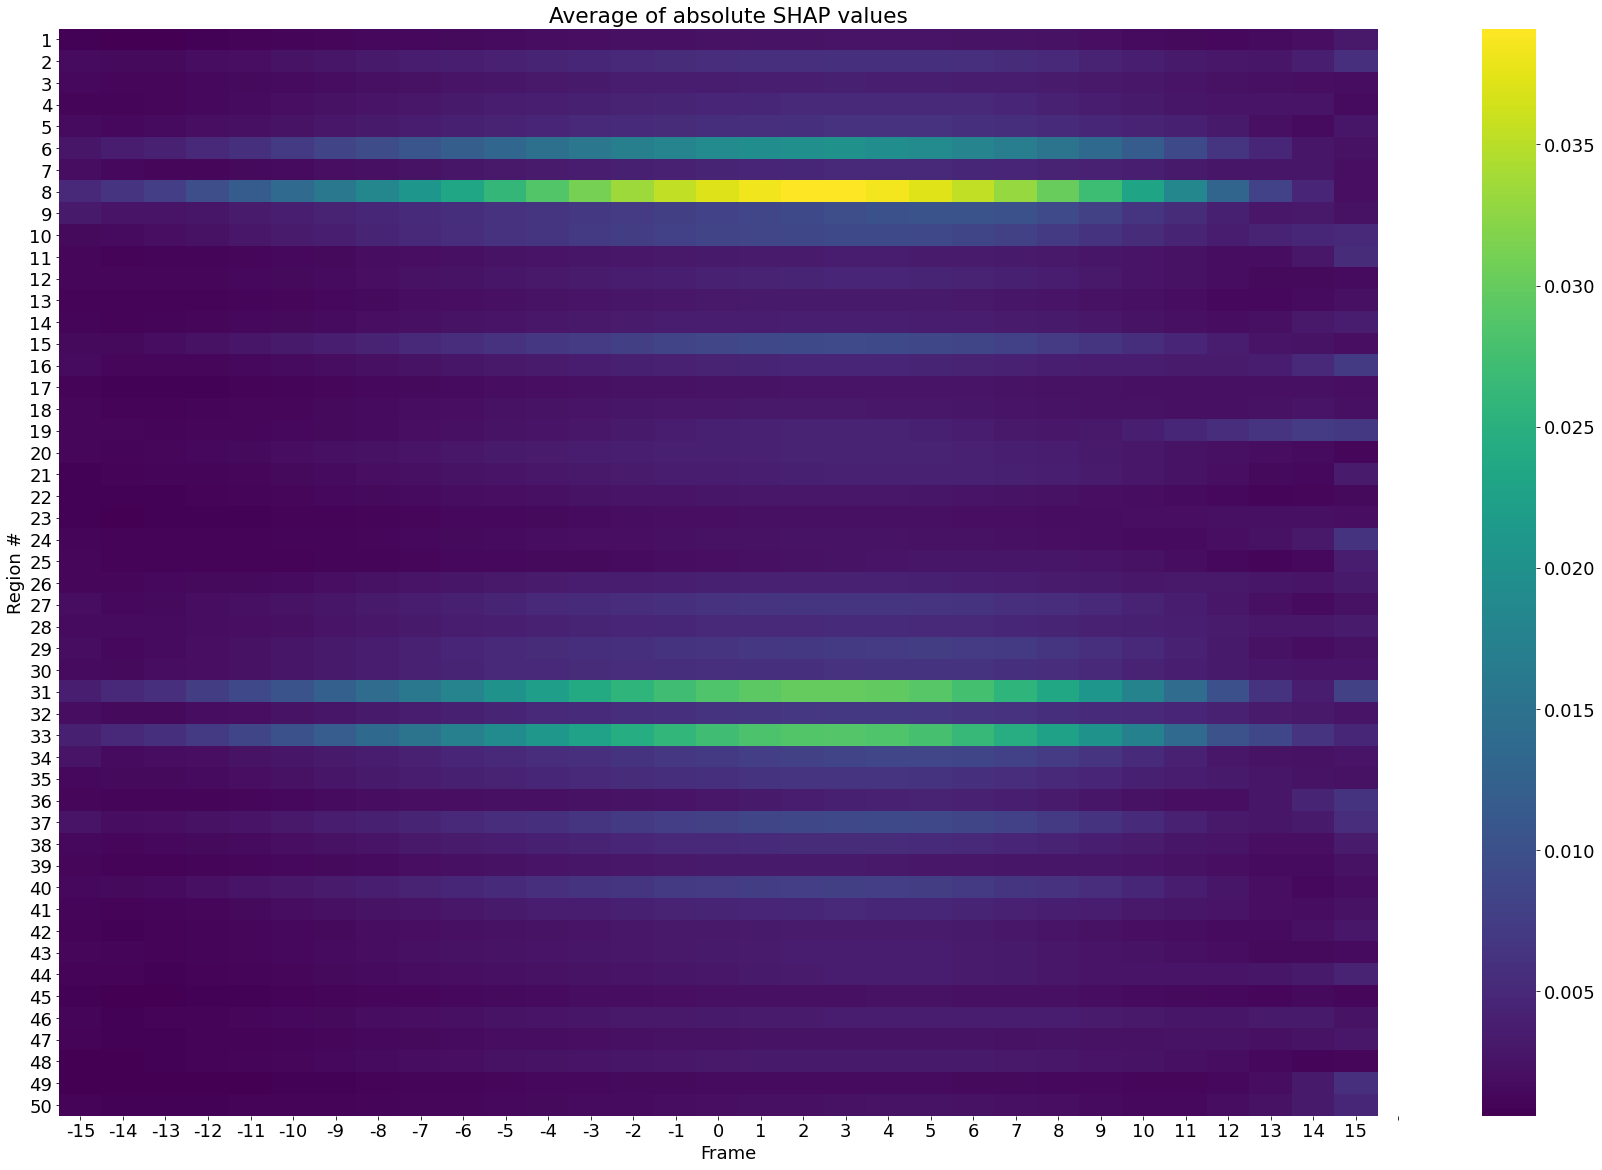

In [10]:
plt.figure(figsize=(30.0, 20.0))
sns.heatmap(mean_val.mean(axis=0).transpose(),cmap='viridis')
plt.xticks( numpy.arange(0.5,32.5), numpy.arange(-15,16))
plt.yticks( numpy.arange(0.5,50.5), numpy.arange(1,51))
plt.title("Average of absolute SHAP values")
plt.xlabel("Frame")
plt.ylabel("Region #")
plt.show()

Text(0.5, 1.0, 'Sum of all frames')

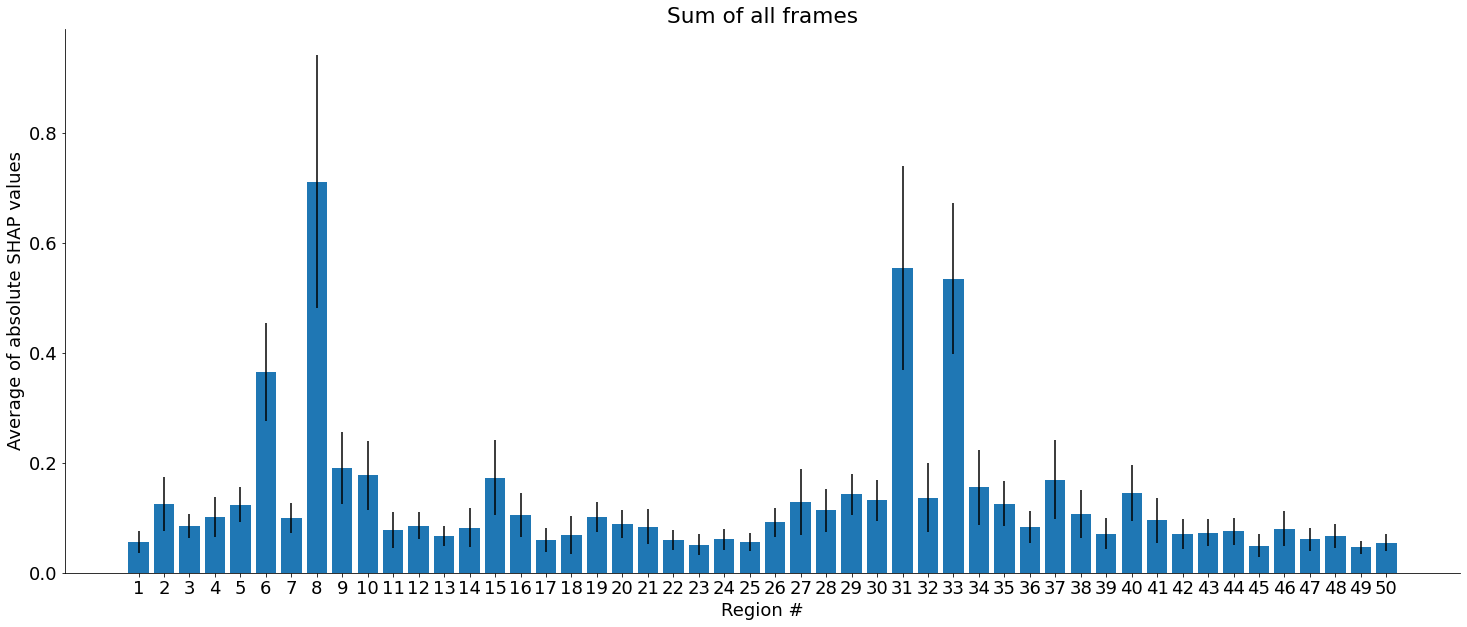

In [11]:
x = numpy.array(range(1,51))
fig, ax = plt.subplots(figsize =(25, 10))
ax.bar(x, mean_val.sum(axis=1).mean(axis=0), yerr=mean_val.sum(axis=1).std(axis=0))
plt.xticks( numpy.arange(1,51), numpy.arange(1,51))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel("Region #")
plt.ylabel("Average of absolute SHAP values")
plt.title("Sum of all frames")